In [1]:
#libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


import random
from random import sample

In [3]:
#dataset exploration

In [4]:
df = pd.read_csv('timeseries_sales.csv')

In [5]:
df.head(3)

,sales_date,periods,rpss
0,06-Jul-23,N Period,17.45
1,07-Jul-23,N Period,17.26
2,08-Jul-23,N Period,18.00


In [6]:
df.describe()

,rpss
count,90.000000
mean,17.348222
std,0.441839
min,16.410000
25%,17.035000
50%,17.290000
75%,17.625000
max,18.360000


In [7]:
df.describe(include='all')

,sales_date,periods,rpss
count,90,90,90.000000
unique,90,2,NaN
top,06-Jul-23,N Period,NaN
freq,1,45,NaN
mean,NaN,NaN,17.348222
std,NaN,NaN,0.441839
min,NaN,NaN,16.410000
25%,NaN,NaN,17.035000
50%,NaN,NaN,17.290000
75%,NaN,NaN,17.625000


In [8]:
df['periods'].unique()

array(['N Period', 'N-1 Period'], dtype=object)

In [9]:
df.groupby(['periods']).mean()

,rpss
periods,
N Period,17.602222
N-1 Period,17.094222


<function matplotlib.pyplot.suptitle(t, **kwargs)>

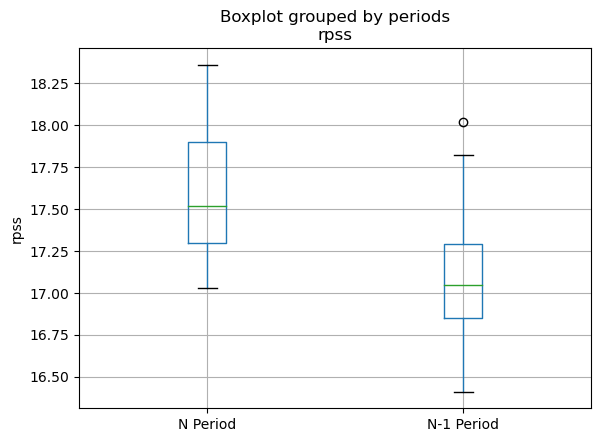

In [10]:
ax=df.boxplot(by='periods', column='rpss')
ax.set_xlabel('')
ax.set_ylabel('rpss')
plt.suptitle

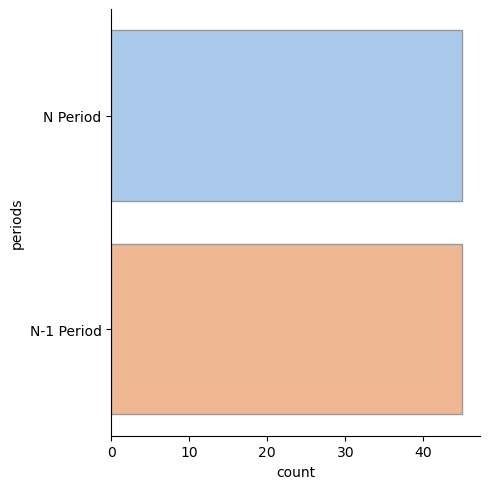

In [11]:
sns.catplot(
    data=df, y="periods", kind="count",
    palette="pastel", edgecolor=".6",
)

In [12]:
#mean difference between categories or sales periods

In [13]:
mean_a = df[df.periods=='N Period'].rpss.mean()
mean_b = df[df.periods=='N-1 Period'].rpss.mean()
mean_a-mean_b

0.5080000000000027

In [14]:
df[df.periods=='N Period'].rpss.mean()

17.602222222222224

In [15]:
df[df.periods=='N-1 Period'].rpss.mean()

17.09422222222222

In [16]:
nA = df[df.periods == 'N Period'].shape[0]
nB = df[df.periods == 'N-1 Period'].shape[0]

In [17]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_A)].mean() - x.loc[list(idx_B)].mean()

In [18]:
print(perm_fun(df.rpss, nA, nB))

-0.013333333333328312


In [19]:
#test and visualization

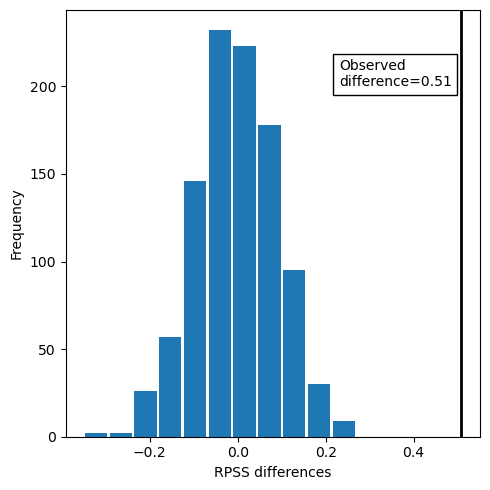

In [20]:
random.seed(1)
perm_diffs = [perm_fun(df.rpss, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_a - mean_b, color='black', lw=2)
ax.text(0.23, 200, 'Observed\ndifference=0.51', bbox={'facecolor':'white'})
ax.set_xlabel('RPSS differences')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
#mean differences from permutation test, or "p value"

In [22]:
perm_diffs = np.array(perm_diffs)
print(np.mean(perm_diffs > mean_a - mean_b))

0.0
